In [ ]:
from scipy.optimize import curve_fit
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def parse(line):
    day_str, time_str, height_str = line.split()

    day = int(day_str)
    hour_str, minute_str = time_str.split(":")
    hour_temp = float(hour_str)
    minute = int(minute_str)

    hour = hour_temp + (day * 24) + (minute/60)

    height = float(height_str)

    return hour, height

In [ ]:
def osci_tide_func(t, amplitude, phase):
    omega = 2 * np.pi / 12.42

    return amplitude * np.sin(omega * t + y)

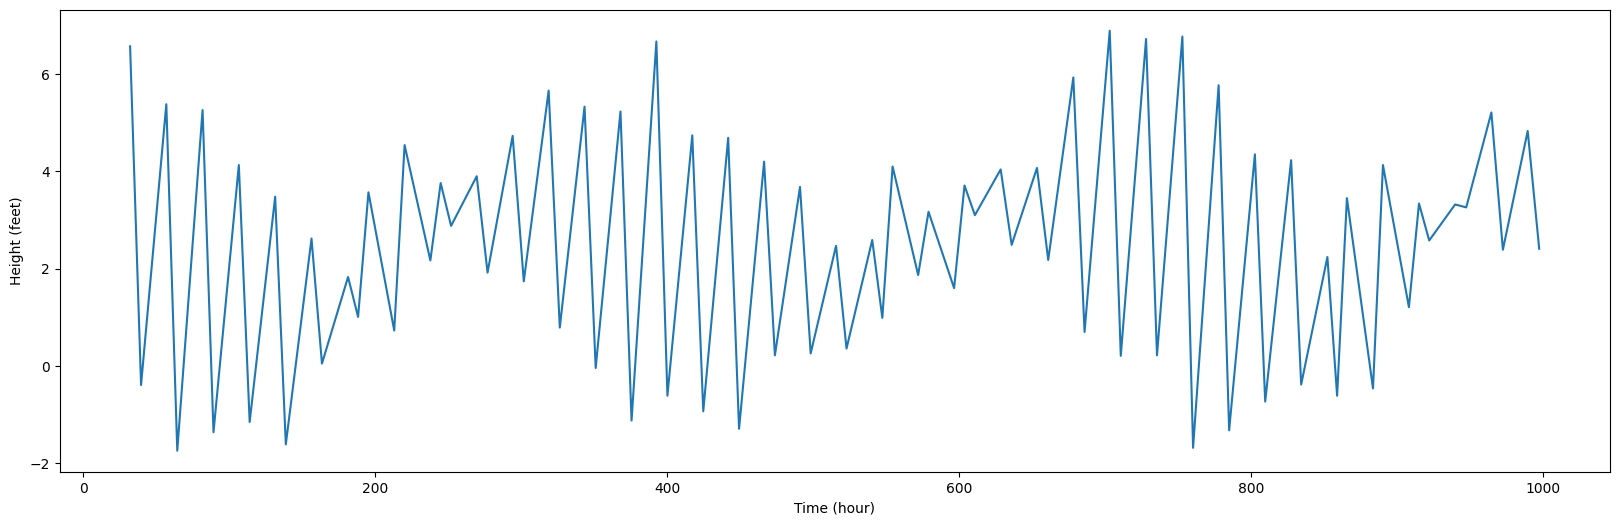

In [ ]:
file = open('ASTR19_F25_group_project_data.txt','r')
data = file.readline()
data = file.readline()
data = file.readline()
line = file.readline()
hour_array = []
height_array = []

while line:
    hour_temp, height_temp = parse(line)
    hour_array.append(hour_temp)
    height_array.append(height_temp)
    line = file.readline()

plt.figure(figsize=(20,6))
plt.plot(hour_array, height_array)
plt.xlabel("Time (hour)")
plt.ylabel("Height (feet)")
plt.show()

file.close() 

In [ ]:
t_hours = np.array(hour_array)
h_tide  = np.array(height_array)

t = t_hours - t_hours[0]

print("Time array sample:", t[:5])
print("Height array sample:", h_tide[:5])

Time array sample: [ 0.          7.5        24.8        32.3        49.63333333]
Height array sample: [ 6.57 -0.39  5.38 -1.74  5.26]


In [ ]:
def tide_model(t, A1, P1, phi1, A2, P2, phi2, offset):
    term1 = A1 * np.sin(2 * np.pi * t / P1 + phi1)
    term2 = A2 * np.sin(2 * np.pi * t / P2 + phi2)
    return term1 + term2 + offset

In [ ]:
sigma_meas = 0.25
sigma_array = sigma_meas * np.ones_like(h_tide)

p0 = [
    3.0, 12.42, 0.0,
    1.0, 24.84, 0.0,
    np.mean(h_tide)
]

popt, pcov = curve_fit(
    tide_model,
    t,
    h_tide,
    p0=p0,
    sigma=sigma_array
)

print("Best-fit parameters:")
print("A1 =", popt[0])
print("P1 =", popt[1])
print("phi1 =", popt[2])
print("A2 =", popt[3])
print("P2 =", popt[4])
print("phi2 =", popt[5])
print("offset =", popt[6])

Best-fit parameters:
A1 = 2.2462708479392752
P1 = 12.400028383566196
phi1 = 0.9070530023616317
A2 = -0.26257839755152207
P2 = 24.867045542675292
phi2 = 5.971425278359338
offset = 2.387407927981969


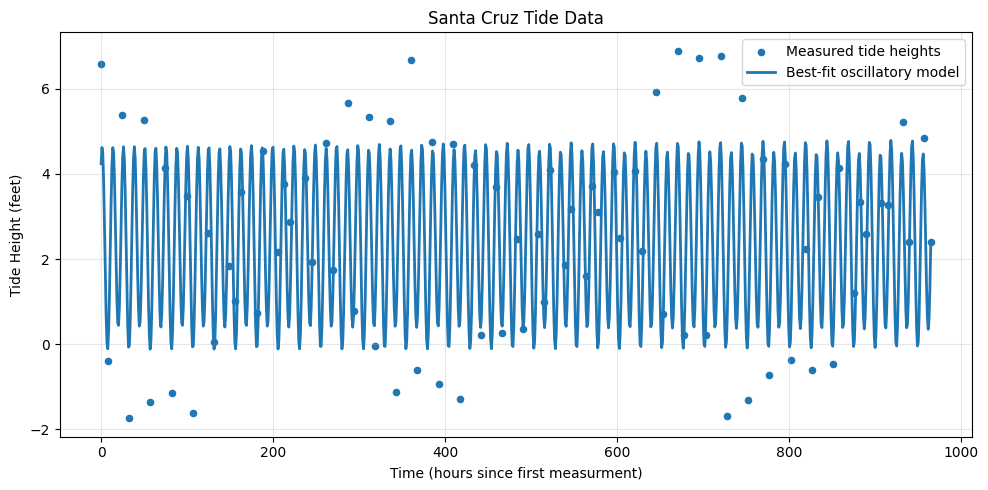

In [ ]:
t_fine = np.linspace(t.min(), t.max(), 1000)
h_model = tide_model(t_fine, * popt)

plt.figure(figsize = (10,5))
plt.scatter(t, h_tide, s=20, label="Measured tide heights")
plt.plot(t_fine, h_model, linewidth=2, label="Best-fit oscillatory model")

plt.xlabel("Time (hours since first measurment)")
plt.ylabel("Tide Height (feet)")
plt.title("Santa Cruz Tide Data")
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()

plt.savefig("tide_model_fit_group_project.pdf")
plt.show()